# Library Import

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

import warnings

In [4]:
warnings.filterwarnings("ignore")
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드

In [5]:
gr = pd.read_csv('/content/drive/MyDrive/InBig_Project/전처리최종파일/강릉_찐찐최종.csv').drop('Unnamed: 0', axis=1)
gr.head()

,날짜,지역,FESTIVAL,관광객,기온(°C),습도(%),강수량(mm),코로나인원,holliday,코로나_차분(1)
0,2019-03-01,강릉시,0.0,179826.0,11.914286,27.571429,0.0,0.0,1.0,0.0
1,2019-03-02,강릉시,0.0,195600.0,12.971429,32.000000,0.0,0.0,1.0,0.0
2,2019-03-03,강릉시,0.0,122036.0,13.571429,34.428571,0.0,0.0,1.0,0.0
3,2019-03-04,강릉시,0.0,63598.0,12.914286,49.714286,0.0,0.0,0.0,0.0
4,2019-03-05,강릉시,0.0,62444.0,14.842857,33.571429,0.0,0.0,0.0,0.0


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Modelling

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
# params
splits = -5
lr = 0.05
n_estimator = 100
gamma = 0.05

## Data Split

In [9]:
gr_data = gr.drop(['날짜', '지역', '코로나_차분(1)'], axis=1)
col_Y = ['관광객']


gr_train = gr_data[:splits]
gr_trainX, gr_trainy = gr_train[gr_train.columns.difference(col_Y)], gr_train[col_Y]
gr_test = gr_data[splits:]
gr_testX, gr_testy = gr_test[gr_test.columns.difference(col_Y)], gr_test[col_Y]

In [10]:
import xgboost as xgb

## Model making

In [11]:
model_tree = xgb.XGBRegressor(booster='gbtree', eval_metric='mae', learning_rate=lr, n_estimator=n_estimator, gamma=gamma)
model_linear = xgb.XGBRegressor(booster='gblinear', eval_metric='mae', learning_rate=lr, n_estimator=n_estimator, gamma=gamma)

In [12]:
model_tree.fit(gr_trainX, gr_trainy)
model_linear.fit(gr_trainX, gr_trainy)

[13:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(booster='gblinear', eval_metric='mae', gamma=0.05,
             learning_rate=0.05, n_estimator=100)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


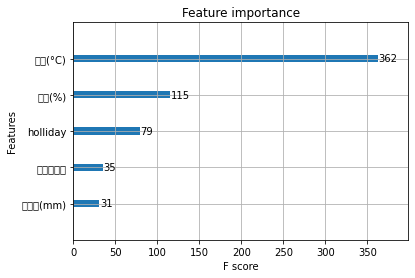

In [13]:
xgb.plot_importance(model_tree)

In [14]:
tree_pred = model_tree.predict(gr_testX)
linear_pred = model_linear.predict(gr_testX)

In [15]:
mae_tree = mean_absolute_error(tree_pred, gr_testy)
mae_linear = mean_absolute_error(linear_pred, gr_testy)

In [16]:
print(f'tree boosting MAE : {mae_tree}')
print(f'linear boosting MAE : {mae_linear}')

tree boosting MAE : 8226.91875
linear boosting MAE : 19947.9828125


In [17]:
print('tree model precition and real case\n')
print(np.round(tree_pred))
print(np.array(gr_testy).reshape(-1))

print('-'*50)

print('linear model precition and real case\n')
print(np.round(linear_pred))
print(np.array(gr_testy).reshape(-1))

print('-'*50)
print(f'tree boosting MAE : {mae_tree}')
print(f'linear boosting MAE : {mae_linear}')

tree model precition and real case

[ 63900.  62947.  99376. 112762.  63900.]
[ 61213.  75860. 123546. 112869.  65157.]
--------------------------------------------------
linear model precition and real case

[83300. 77117. 92909. 89787. 87834.]
[ 61213.  75860. 123546. 112869.  65157.]
--------------------------------------------------
tree boosting MAE : 8226.91875
linear boosting MAE : 19947.9828125


In [18]:
pred_df = pd.DataFrame(columns=['number', 'tree_pred','linear_pred', 'real'])
pred_df['number'] = [1,2,3,4,5]
pred_df['tree_pred'] = tree_pred
pred_df['linear_pred'] = linear_pred
pred_df['real'] = np.array(gr_testy).astype(float).reshape(-1)

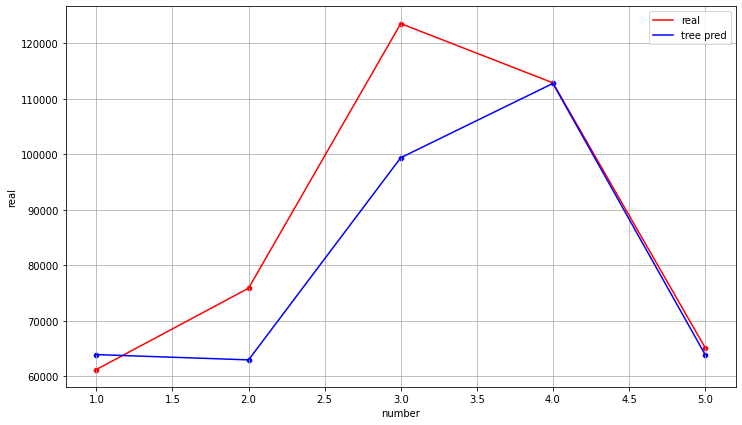

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=pred_df,x='number', y='real', color='r')
sns.scatterplot(data=pred_df,x='number', y='real', color='r')
sns.lineplot(data=pred_df,x='number', y='tree_pred', color='b')
sns.scatterplot(data=pred_df,x='number', y='tree_pred', color='b')

plt.legend(labels=['real', 'tree pred'])
plt.grid()
plt.show()